# Sentiment analysis

In [1]:
#Questions

#Are Michelle’s tweet being mostly positive, neutral or negative? 
#Which words stand out from the sentiment analysis?


In [2]:
# Install and Import necessary libraries

#pip install tweepy    #requriement already fulfilled 
#pip install textblob   #requriement already fulfilled

import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re    #regular expression
import matplotlib.pyplot as plt


# Install wordcloud and Import necessary libraries
#!pip install wordcloud    #requriement already fulfilled 

from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
 
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)

In [3]:
#Import the configuration i.e keys saved from twitter developer account
#twitter access tokens

configuration=pd.read_csv("C:\\Users\\bitiy\\Documents\\PythonProjects\\sentiment analysis\\API_config.csv")


In [4]:
#create variable for each of them and retrieve all the individual keys

twitterAPIKey= configuration['twitterAPIKey'][0]
twitterAPISecret= configuration['twitterAPISecret'][0]
twitterAPIAccessToken= configuration['twitterAPIAccessToken'][0]
twitterAPIAccessTokenSecret= configuration['twitterAPIAccessTokenSecret'][0]

In [5]:
#Authenticate and set token using Tweepy

#authenticate the tokens
auth=tweepy.OAuthHandler(twitterAPIKey,twitterAPISecret)

# Set access token
auth.set_access_token(twitterAPIAccessToken,twitterAPIAccessTokenSecret)
twitterApi= tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
# create empty list which willl be used to store the data
results=[]

In [7]:
timeline = tweepy.Cursor(twitterApi.user_timeline, screen_name='@MichelleObama', tweet_mode="extended").items(1000)

for status in timeline:
    data = (
    status.user.id,
    status.user.screen_name,
    status.user.name,
    status.full_text,
    status.created_at,
    status.lang)
    results.append(data)

cols = "user_id screen_name name text date lang".split()
df = pd.DataFrame(results, columns=cols)

In [8]:
df.head()

,user_id,screen_name,name,text,date,lang
0,409486555,MichelleObama,Michelle Obama,Congratulations @Beyonce for making history. T...,2023-02-07 01:00:43+00:00,en
1,409486555,MichelleObama,Michelle Obama,"For more information, go to https://t.co/lJTou...",2023-02-01 13:36:06+00:00,en
2,409486555,MichelleObama,Michelle Obama,I’m thrilled to share that my new @HGMedia pod...,2023-02-01 13:35:40+00:00,en
3,409486555,MichelleObama,Michelle Obama,I'd love to hear from you. What's a practice o...,2023-01-30 17:07:40+00:00,en
4,409486555,MichelleObama,Michelle Obama,"For me, the practice I’ve had—and the effort I...",2023-01-30 17:07:39+00:00,en


In [9]:
#Tweet Cleaning function
def cleanUpTweet(txt):
  #remove all the mentions using regular expression
  txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
  #remove hashtags
  txt = re.sub(r'#', '', txt)
  #remove retweets
  txt = re.sub(r'RT : ', '', txt)
  #remove urls
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
  return txt

In [10]:
df['text']=df['text'].apply(cleanUpTweet)

In [11]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity


In [12]:
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity


In [13]:
df['Subjectivity']=df['text'].apply(getTextSubjectivity)

In [14]:
df['Polarity']=df['text'].apply(getTextPolarity)

In [15]:
df.head(10)

,user_id,screen_name,name,text,date,lang,Subjectivity,Polarity
0,409486555,MichelleObama,Michelle Obama,Congratulations for making history. Thank you...,2023-02-07 01:00:43+00:00,en,0.500000,0.380682
1,409486555,MichelleObama,Michelle Obama,"For more information, go to",2023-02-01 13:36:06+00:00,en,0.500000,0.500000
2,409486555,MichelleObama,Michelle Obama,"I’m thrilled to share that my new podcast, Th...",2023-02-01 13:35:40+00:00,en,0.550909,0.427273
3,409486555,MichelleObama,Michelle Obama,I'd love to hear from you. What's a practice o...,2023-01-30 17:07:40+00:00,en,0.600000,0.500000
4,409486555,MichelleObama,Michelle Obama,"For me, the practice I’ve had—and the effort I...",2023-01-30 17:07:39+00:00,en,0.525000,0.258333
5,409486555,MichelleObama,Michelle Obama,"In my book TheLightWeCarry, I share some of th...",2023-01-30 17:07:06+00:00,en,0.250000,0.000000
6,409486555,MichelleObama,Michelle Obama,"Today, we honor Hadiya Pendleton—a beautiful l...",2023-01-29 17:30:04+00:00,en,0.366667,0.250000
7,409486555,MichelleObama,Michelle Obama,Along with mourning Tyre and supporting his fa...,2023-01-28 18:16:05+00:00,en,0.250000,0.250000
8,409486555,MichelleObama,Michelle Obama,"The vicious, unjustified beating of Tyre Nicho...",2023-01-28 18:15:10+00:00,en,1.000000,-0.500000
9,409486555,MichelleObama,Michelle Obama,"Barack, , and I can’t wait to welcome a new cl...",2023-01-25 15:33:07+00:00,en,0.618182,0.323485


In [16]:
#drop all columns having null tweets
df = df.drop(df[df['text']==''].index)

In [17]:
df.tail()

,user_id,screen_name,name,text,date,lang,Subjectivity,Polarity
995,409486555,MichelleObama,Michelle Obama,Happy ElectionDay to folks across the country ...,2019-11-05 14:54:07+00:00,en,1.000000,1.000000
996,409486555,MichelleObama,Michelle Obama,"It’s ElectionDay tomorrow in Virginia, New Jer...",2019-11-04 18:56:07+00:00,en,0.671717,0.380682
997,409486555,MichelleObama,Michelle Obama,"Today’s the first day of open enrollment on , ...",2019-11-01 20:37:21+00:00,en,0.444444,0.250000
998,409486555,MichelleObama,Michelle Obama,“Social change starts with a story.” \n\nAt th...,2019-11-01 20:34:44+00:00,en,0.066667,0.033333
999,409486555,MichelleObama,Michelle Obama,Congrats to the World Champion and their fans...,2019-10-31 15:45:38+00:00,en,0.750000,0.800000


In [18]:
df.isna().sum()  #no missing data

user_id         0
screen_name     0
name            0
text            0
date            0
lang            0
Subjectivity    0
Polarity        0
dtype: int64

In [19]:
#get sentiment analysis/text analysis 

#polarity value < 0  -> negative sentiment
#polarity value = 0  -> neutral sentiment
#polarity value > 0  -> positive sentiment

#define a function to classify the sentiment as positive,neutral or negative.

def getTextAnalysis(pol):
  if pol < 0:
    return "Negative"
  elif pol == 0:
    return "Neutral"
  else:
    return "Positive"

In [20]:
df['Sentiment'] = df['Polarity'].apply(getTextAnalysis)

In [21]:
df.head()

,user_id,screen_name,name,text,date,lang,Subjectivity,Polarity,Sentiment
0,409486555,MichelleObama,Michelle Obama,Congratulations for making history. Thank you...,2023-02-07 01:00:43+00:00,en,0.500000,0.380682,Positive
1,409486555,MichelleObama,Michelle Obama,"For more information, go to",2023-02-01 13:36:06+00:00,en,0.500000,0.500000,Positive
2,409486555,MichelleObama,Michelle Obama,"I’m thrilled to share that my new podcast, Th...",2023-02-01 13:35:40+00:00,en,0.550909,0.427273,Positive
3,409486555,MichelleObama,Michelle Obama,I'd love to hear from you. What's a practice o...,2023-01-30 17:07:40+00:00,en,0.600000,0.500000,Positive
4,409486555,MichelleObama,Michelle Obama,"For me, the practice I’ve had—and the effort I...",2023-01-30 17:07:39+00:00,en,0.525000,0.258333,Positive


In [22]:
#calculate positive percentage
positive = df[df['Sentiment']=='Positive']
POS = positive.shape[0]/df.shape[0]*100
print(str(round(POS))+ "% of positive tweets")

76% of positive tweets


In [23]:
#calculate neutral percentage
neutral = df[df['Sentiment']=='Neutral']
NEU = neutral.shape[0]/df.shape[0]*100
print(str(round(NEU))+ "% of neutral tweets")

17% of neutral tweets


In [24]:
#calculate negative percentage
negative = df[df['Sentiment']=='Negative']
NEG = negative.shape[0]/df.shape[0]*100
print(str(round(NEG))+ "% of negative tweets")

6% of negative tweets


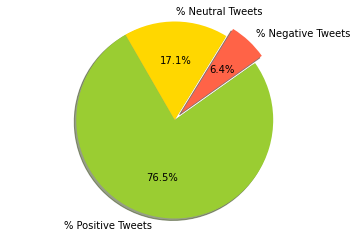

In [25]:
#Are Michelle’s tweet being mostly positive, neutral or negative? 

#Visualization using Pie Chart
explode = (0,0.1,0)
labels = '% Positive Tweets', '% Negative Tweets', '% Neutral Tweets'
sizes = [POS,NEG,NEU]
colors = ['yellowgreen', 'tomato', 'gold']  

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 120,shadow = True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#ax1.set_title('Percentage of Sentiment Analysis')
plt.savefig('Pie chart.jpg')
plt.show()

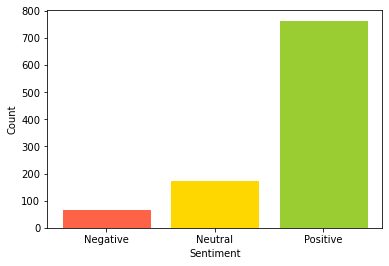

In [26]:
#Visualization using Bar Graph
fig2, ax2 = plt.subplots()
labels = df.groupby('Sentiment').count().index.values
values = df.groupby('Sentiment').size().values
barlist = ax2.bar(labels, values)
#ax2.set_title('Number of Tweets for each Sentiment')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
barlist[0].set_color('tomato') 
barlist[1].set_color('gold') 
barlist[2].set_color('yellowgreen')
plt.savefig('Bar graph.jpg')
plt.show()

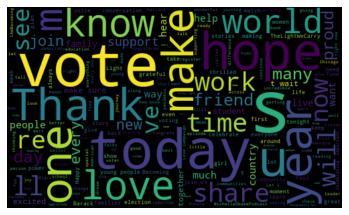

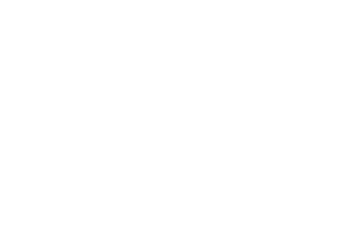

In [27]:
# Which words stand out from the sentiment analysis?
# now lets visualize the most commonly occuring words using wordcloud

# word cloud visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
#plt.title('Total Reviews of Word Cloud')
plt.show()
plt.axis('off')
plt.savefig('Word cloud.jpg')